In [ ]:
# Project Objectives

#     Describe data to answer key questions to uncover insights
#     Gain valuable insights that will help improve online retail performance
#     Provide analytic insights and data-driven recommendations

# Dataset

# The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named Online Retail.xlsx. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded here.

# The dataset contains the following columns:

#     InvoiceNo: Invoice number of the transaction
#     StockCode: Unique code of the product
#     Description: Description of the product
#     Quantity: Quantity of the product in the transaction
#     InvoiceDate: Date and time of the transaction
#     UnitPrice: Unit price of the product
#     CustomerID: Unique identifier of the customer
#     Country: Country where the transaction occurred

# Tasks

# You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

#     Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
#     Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
#     Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
#     Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
#     Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
#     Explore the top-selling products and countries based on the quantity sold.
#     Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
#     Draw conclusions and summarize your findings from the exploratory data analysis.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('C:\\Users\\USER\\Downloads\\CO2WZWHLQ3GpXlr5Rkeq4w_online_retail\\Online Retail.xlsx')

# Display basic information about the dataset
print(df.head())
print('\
Dataset Info:')
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------    

In [6]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [8]:
# Remove Duplicates: Ensure there are no duplicate entries by using the drop_duplicates() function.
df = df.drop_duplicates()

In [9]:
# Basic statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


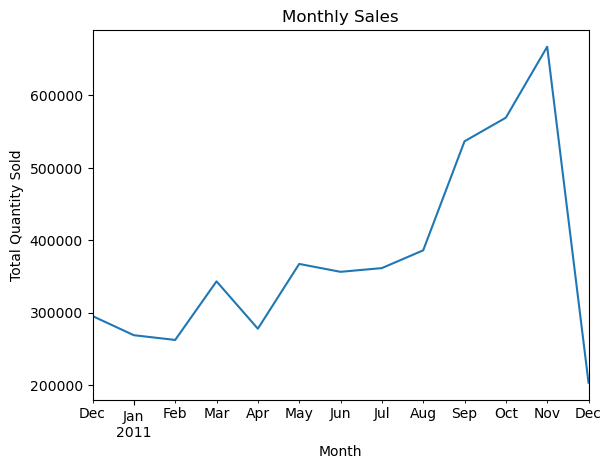

In [10]:
#  Data Visualization
# Use visualization to explore patterns and trends:
# Sales Over Time: Convert InvoiceDate to datetime, then group by month to identify sales trends over time.

import matplotlib.pyplot as plt

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by month and plot sales trends
monthly_sales = df.groupby('YearMonth')['Quantity'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

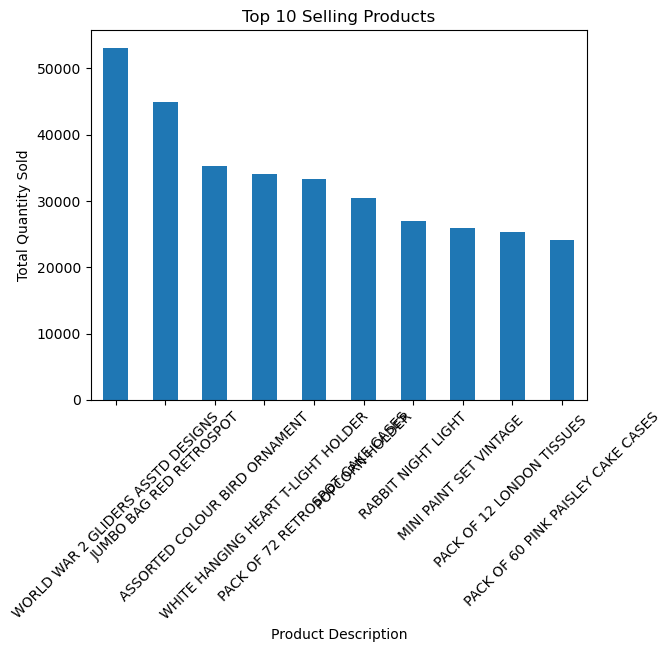

In [11]:
# Top-Selling Products: Identify and plot the products with the highest quantities sold.
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

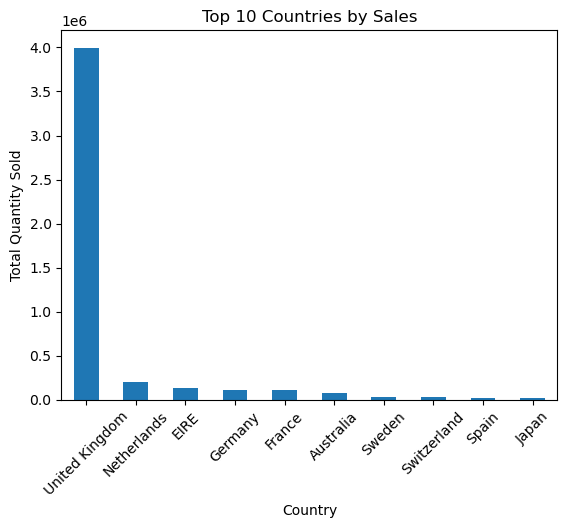

In [12]:
# Top Countries by Sales: Plot total sales by country to see where the store is most popular.

top_countries = df.groupby('Country')['Quantity'].sum().nlargest(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

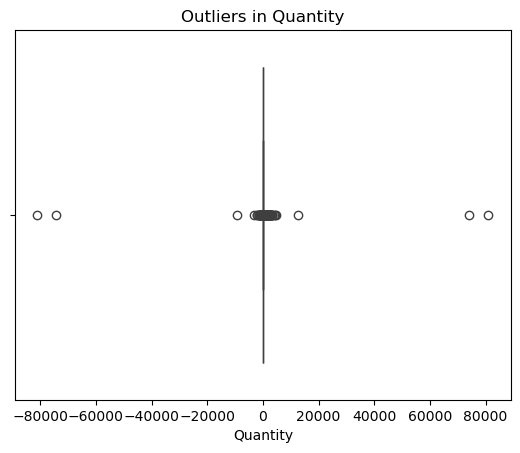

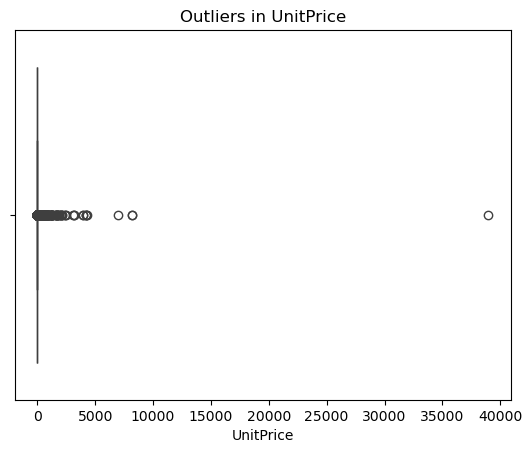

In [13]:
# Identifying Outliers and Anomalies
# Look for unusually high or low values in Quantity and UnitPrice, as these may indicate errors or anomalies.

# Checking for outliers
import seaborn as sns

sns.boxplot(x=df['Quantity'])
plt.title('Outliers in Quantity')
plt.show()

sns.boxplot(x=df['UnitPrice'])
plt.title('Outliers in UnitPrice')
plt.show()

In [ ]:
"""
Recommendations:

    Targeted Marketing: Offer personalized deals or discounts for high-value customers and re-engagement offers for lapsed customers.
    Product Recommendations: Tailor recommendations based on the purchase history of customer segments.
    Loyalty Programs: Implement programs to encourage frequent purchases among high-potential customer groups.

   Promote High-Profit Products: Emphasize promoting products with high profitability in marketing and sales.
   Optimize Inventory: Stock higher quantities of high-profit products and reduce inventory for low-profit products unless 
    they’re strategically important.
   Bundle Products: Consider bundling low-margin products with high-margin products to increase sales of less profitable items.
   Additional Consultation and Strategic Recommendations

    Market Expansion: Based on the sales distribution by country, consider targeting countries with growing demand but lower sales.
    This could include localized marketing or partnerships.
    Inventory Management: Use insights from the demand patterns to streamline inventory, reduce overstocking of low-demand items,
    and ensure stock availability for high-demand products.
    Customer Feedback Loop: Set up a system to gather and analyze customer feedback on product quality
    and service to continuously improve the customer experience.
    Optimize Price Points: If your data shows customers prefer certain price ranges, consider adjusting prices of lower-profit items 
    to align with these preferences and potentially increase volume.
"""                                                                                   